# Projeto 1 - Predição da precificação de casas 
## House Sales in King County, USA - Kaggle

_________

## Introdução

Este é um conjunto de dados armazenado no Kaggle, uma plataforma de estudo e competições de Ciência de Dados. Segue a tradução sobre o conjunto de dados.

**"Este conjunto de dados contém preços de venda de casas para King County, que inclui Seattle. Inclui casas vendidas entre maio de 2014 e maio de 2015."**

Segue a descrição das variaveis: 
| Nome da Variavel | Descrição da variavel |
| -- | -- |
| id | ID exclusivo para cada casa vendida | 
| date | Data da venda da casa | 
| price | Preço de cada casa vendida | 
| bedrooms | Número de quartos  |
| bathrooms | Número de banheiros, onde 0,5 representa um quarto com vaso sanitário, mas sem chuveiro  |
| sqft_living | Pés quadrados do espaço interior dos apartamentos  |
| sqft_lot | Pés quadrados do terreno  |
| floors | Número de andares  |
| waterfront | Uma variável fictícia para saber se o apartamento estava com vista para a orla ou não  |
| view | Um índice de 0 a 4 de quão boa era a vista do imóvel  |
| condition | Um índice de 1 a 5 sobre a condição do apartamento,|
| grade | Um índice de 1 a 13, onde 1 a 3 fica aquém da construção e design de edifícios, 7 tem um nível médio de construção e design e 11 a 13 tem um alto nível de construção e design. |
| sqft_above | Pés quadrados do espaço interno da habitação que está acima do nível do solo |
| sqft_basement | Pés quadrados do espaço interno da habitação que está abaixo do nível do solo|
| yr_built | O ano em que a casa foi construída inicialmente|
| yr_renovated | O ano da última reforma da casa|
| zipcode | Em que área de código postal a casa está|
| lat | Latitude|
| long | Longitude|
| sqft_living15 | Pés quadrados do espaço habitacional interior para os 15 vizinhos mais próximos|
| sqft_lot15 | Pés quadrados dos lotes dos 15 vizinhos mais próximos|

_________

# Sobre este projeto

Este é o primeiro projeto do segundo módulo do curso de Ciência de Dados da BlueEdTech. O projeto tem o intuito de treinar os conhecimentos adquiridos a cerca do curso ate o atual momento. E por subsequente, demonstrar as dificuldades na hora de aplicar os mesmos.

Os principais pontos que serão avaliados:

- Levantamento de hipoteses
- Manipulação de dados e criação de gráficos simples com o `Pandas`
- Criar um modelo usando regressão linear e justificar

_________

# Preparação do ambiente

- Acessem o link - https://www.kaggle.com/datasets/harlfoxem/housesalesprediction e logo abaixo e clique em "Download". Caso voce não tenha uma conta no Kaggle, crie uma e retorne para esse ponto para realizar o download.

_________

Faremos uma analise exploratoria sobre estes dados. Para isso, será utilizada a biblioteca numpy para obter a contagem da média, mediana e os quartis.

In [1]:
# Leitura dos Dados
import pandas as pd
df1 = pd.read_csv('kc_house_data.csv')
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


___

- Como alguns dados na base de dados estão em pés quadrados (sqft), o comando a baixo faz a conversão de pés quadrados (ft²) pra metros quadrados (m²) para a melhor interpretação dos dados.

- Como 1ft² corresponde a 0.092903m², basta fazer a multiplicação da quantidade de pés quadrados por 0.092903 para obter o equivalente em m².

In [2]:
# Conversão dos dados de ft² para m² 
df2 = df1
df2['sqft_living'] = (df2['sqft_living'] * 0.092903).round(3)
df2['sqft_lot'] = (df2['sqft_lot'] * 0.092903).round(3)
df2['sqft_above'] = (df2['sqft_above'] * 0.092903).round(3)
df2['sqft_basement'] = (df2['sqft_basement'] * 0.092903).round(3)
df2['sqft_living15'] = (df2['sqft_living15'] * 0.092903).round(3)
df2['sqft_lot15'] = (df2['sqft_lot15'] * 0.092903).round(3)
df2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,109.626,524.902,1.0,0,0,...,7,109.626,0.000,1955,0,98178,47.5112,-122.257,124.490,524.902
1,6414100192,20141209T000000,538000.0,3,2.25,238.761,672.804,2.0,0,0,...,7,201.600,37.161,1951,1991,98125,47.7210,-122.319,157.006,709.686
2,5631500400,20150225T000000,180000.0,2,1.00,71.535,929.030,1.0,0,0,...,6,71.535,0.000,1933,0,98028,47.7379,-122.233,252.696,748.984
3,2487200875,20141209T000000,604000.0,4,3.00,182.090,464.515,1.0,0,0,...,7,97.548,84.542,1965,0,98136,47.5208,-122.393,126.348,464.515
4,1954400510,20150218T000000,510000.0,3,2.00,156.077,750.656,1.0,0,0,...,8,156.077,0.000,1987,0,98074,47.6168,-122.045,167.225,697.051


A função round() utilizada anteriormente, é uma função interna do python, que arredonda para o número de dígitos fornecido e retorna o número de ponto flutuante. 

___

In [3]:
import numpy as np

Col= len(df2.columns) #Variavel responsavel por calcular a quantidade de colunas da base de dados
Lin = len(df2.index) #Variavel responsavel por calcular a quantidade de linhas da base de dados
media = np.mean(df2['sqft_living'])
mediana = np.median(df2['sqft_living'])
quart_1 = np.percentile(df2['sqft_living'], 25)
quart_3 = np.percentile(df2['sqft_living'], 75)


As funções 'mean', 'median' e 'percentile' são funfções interças da biblioteca numpy. A função mean é a função responsável por calcular o tamanho medio das casas, já o median, é responsável por calcular a mediana das mesmas. 

A função percentile, é a função responsável por calcular os quartis do tamanho das casas passando a posição dos quartis desejados, sendo o 25 o 1º quartil, 50 o 2º ou a mediana, e 75 o 3º quartil.

___

Abaixo, podemos ver o resultado da saída dos dados. (Considere as 'observações' como a quantidade de linhas e 'variáveis' como a quantidade de colunas do Data Frame).

In [4]:
# Visualização dos dados
print(f'Existem {Lin} observações no conjunto de dados')
print(f'Existem {Col} variáveis no conjunto de dados')
print(f'O tamanho médio das casa é de: {media:.2f}m²')
print(f'A mediana do tamanho das casas é de: {mediana:.2f}m²')

# Quartis
print(f'1º Quartil do tamanho das casas: {quart_1:.2f}')
print(f'3º Quartil do tamanho das casas: {quart_3:.2f}')


Existem 21613 observações no conjunto de dados
Existem 21 variáveis no conjunto de dados
O tamanho médio das casa é de: 193.23m²
A mediana do tamanho das casas é de: 177.44m²
1º Quartil do tamanho das casas: 132.57
3º Quartil do tamanho das casas: 236.90


Com base nos dados vistos até agora, algumas perguntas podem surgir no decorrer do caminho. No momento, nos atentaremos a apenas uma:

- Neste conjunto de dados há casas com tamanho muito acima ou abaixo do esperado (outliers)?

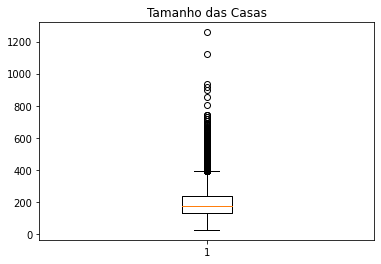

In [5]:
# Contrução do Bloxplot para o tamanho das casas;
import matplotlib.pyplot as plt

plt.boxplot(df2['sqft_living'])
plt.title("Tamanho das Casas")
plt.show()

Observando os dados no boxplot, pedemos ver a densa quantidade de observações acima do limite superior no gráfico, podemos perceber que existem grandes quantidades de observações com tamanhos a cima do esperado.

___

A partir daqui, construiremos alguns modelos de regressão lienar para predizermos o preço **(price)** das casas com **statsmodels** e **sklearn**.

Neste primeiro exemplo, usaremos a biblioteca **statsmodels.api** para fazermos a primeira predição e geraremos um gráfico com o **OLS (Ordinary Least Square )**.

In [6]:
import statsmodels.api as sm

In [7]:
X_treino = df2.drop(['price','date','id','zipcode'], axis=1)
y_treino = df2['price']

X_sm = sm.add_constant(X_treino)
mod = sm.OLS(exog=X_sm, endog=y_treino)
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     2900.
Date:                Sat, 30 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:21:50   Log-Likelihood:            -2.9476e+05
No. Observations:               21613   AIC:                         5.896e+05
Df Residuals:                   21595   BIC:                         5.897e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.686e+07    1.6e+06    -23.106

___

Neste segundo exemplo, faremos outro modelo utilizando a biblioteca **sklearn**.

In [8]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

In [9]:
X = df2.drop(['price','date','id','zipcode'], axis=1)
y = df2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

regression = LinearRegression()
regression.fit(X_train, y_train)

y_pred = regression.predict(X_test)

In [10]:
r2_train = regression.score(X_train, y_train)
r2_test = regression.score(X_test, y_test)
mae_train = mean_absolute_error(y_test, y_pred)

A baixo, podemos ver as saidas dos valores de ${R}^{2}$ e $MAE$ obtidos.

In [11]:
print(f'R² no set de treino: {r2_train:.2f}')
print(f'R² no set de teste: {r2_test:.2f}')
print(f'O valor de MAE obitido é : US${mae_train:.2f}')

R² no set de treino: 0.70
R² no set de teste: 0.69
O valor de MAE obitido é : US$127189.27


___

Por fim, faremos um terceiro novo modelo, utilizando a seleção de caracteristicas, e selecionando as 5 variaveis mais importantes.

In [12]:
X = df2.drop(['price', 'date', 'id', 'zipcode'], axis=1)
y = df2['price']
X_std = StandardScaler().fit_transform(X)

In [13]:
regression = LinearRegression()
selector = RFE(regression, n_features_to_select=8, step=1)
selector = selector.fit(X_std, y)

In [14]:
X = X[X.columns[selector.support_]]
X_std = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.33, random_state=42)

In [15]:
regressLinear = LinearRegression()
regressLinear.fit(X_train, y_train)
y_pred = regressLinear.predict(X_test)

In [16]:
R2 = r2_score(y_test, y_pred)
Mae = mean_absolute_error(y_test, y_pred)

In [ ]:
print(f'O valor de R²: {R2:.2f}')
print(f'O valor de Erro Médio Absoluto: US${Mae:.2f}')
print(f'As variáveis mais importantes foram: {X.columns}')

___

A capacidade de comunicação é um dos principais pontos na análise de dados, pois sua análise deve ser tão boa quanto a sua capacidade de comunicá-la. Para isso usamos tabelas resumo e gráficos para apresentar os principais achados do trabalho realizado. Podemos adicionar outros materias que possam aprofundar essa apresentação como artigos e outros estudos realizados.

Assim, quatro perguntas podem ser feitas:

- 1º A qualidade da casa influencia no preço? 

- 2º A localização da casa também influencia no preço? 

- 3º Qual visualização interessante destacar?

- 4º A sua visualização responde uma das suas perguntas? Se não, o que ela responde?

In [17]:
import pandas as pd
import seaborn as sns
df1 = pd.read_csv('kc_house_data.csv')
df1.corr()['price']

id              -0.016762
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

<AxesSubplot:xlabel='grade', ylabel='price'>

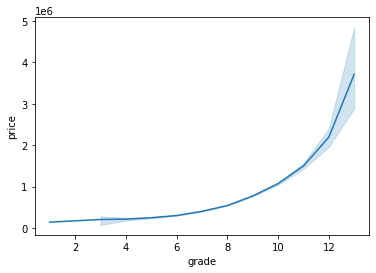

In [18]:
#A qualidade da casa influencia no preço?

sns.lineplot(x='grade', y='price', data=df1)

<AxesSubplot:xlabel='zipcode', ylabel='price'>

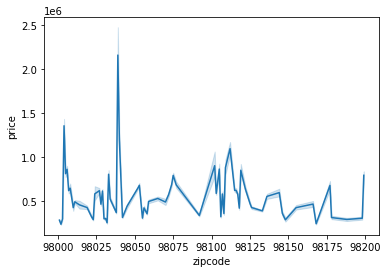

In [19]:
#A localização da casa também influencia no preço?

sns.lineplot(x='zipcode', y='price', data=df1)

___

Mais sobre:
* **round():** https://medium.com/@ealexbarros/utilizando-a-fun%C3%A7%C3%A3o-round-em-python-c92541d5c6c1

* **statsmodels.api:** https://www.statsmodels.org/stable/index.html

* **summary()** https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/summary

* **mean**: https://numpy.org/doc/stable/reference/generated/numpy.mean.html

* **median**: https://numpy.org/doc/stable/reference/generated/numpy.median.html

* **percentile**: https://numpy.org/doc/stable/reference/generated/numpy.percentile.html

* **RFE:** https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

* **StandardScaler:** https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

* **LinearRegression:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

* **train_test_split:** https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
* **r2_score:** https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

* **mean_absolute_erro:** https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

* **predict():** https://www.askpython.com/python/examples/python-predict-function

* **fit(), transform(), fit_transform():** https://www.analyticsvidhya.com/blog/2021/04/difference-between-fit-transform-fit_transform-methods-in-scikit-learn-with-python-code/

* **corr():** https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html